## Pre Processing

In [1]:
import pandas as pd
import numpy as np
import os
os.listdir()

['README.md',
 'Sales.ipynb',
 'sample_submission.csv',
 'store.csv',
 'test.csv',
 'train.csv']

In [2]:
store = pd.read_csv('store.csv')
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
store.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [4]:
data = pd.read_csv('train.csv')
data.head()

C:\Users\Ayush\AppData\Local\Temp\ipykernel_13648\2616829868.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
data.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

The training data is clean. There is no null value

In [6]:
train = data.merge(store, how='left', on='Store')
train.sample(4)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
820016,162,3,2013-06-26,5611,442,1,0,0,0,d,c,5340.0,3.0,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
608047,43,4,2014-01-02,5839,540,1,0,0,1,d,a,4880.0,NaN,NaN,1,37.0,2009.0,"Jan,Apr,Jul,Oct"
877427,708,1,2013-05-06,3274,375,1,0,0,0,c,c,11470.0,10.0,2009.0,1,18.0,2014.0,"Jan,Apr,Jul,Oct"
874353,979,4,2013-05-09,0,0,0,0,a,0,a,c,2270.0,11.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [7]:
data.shape, train.shape

((1017209, 9), (1017209, 18))

In [8]:
test = pd.read_csv('test.csv').merge(store, how='left', on='Store')
test.sample(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
6336,6337,448,4,2015-09-10,1.0,0,0,0,a,c,3970.0,9.0,2009.0,0,NaN,NaN,NaN
27396,27397,9,7,2015-08-16,0.0,0,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
41022,41023,1031,6,2015-08-01,1.0,0,0,0,d,a,590.0,5.0,2001.0,0,NaN,NaN,NaN
8789,8790,300,1,2015-09-07,1.0,0,0,0,a,c,120.0,4.0,2009.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
5683,5684,710,5,2015-09-11,1.0,0,0,1,d,a,1500.0,9.0,2008.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [9]:
for col in train.columns.tolist():
    if col not in test.columns:
        print(col)

Sales
Customers


There are 2 missing colums where we have to predict the values of sales

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [11]:
train.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.085652,7715.323700,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.222866,3.211832,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.690228,5.992644,1900.0,2006.0,2010.0,2013.0,2015.0


In [13]:
train.duplicated().sum()

0

Parsing the dates to the pd.datetime format

In [14]:
train.Date = pd.to_datetime(train.Date)
test.Date = pd.to_datetime(test.Date)
train.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
74773,69,1,2015-05-25,0,0,0,0,a,0,c,c,1130.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
631205,901,5,2013-12-13,8461,684,1,0,0,0,a,c,3170.0,4.0,2014.0,0,NaN,NaN,NaN
502145,66,1,2014-04-07,5155,516,1,0,0,0,d,a,7660.0,NaN,NaN,1,37.0,2009.0,"Jan,Apr,Jul,Oct"
887529,775,6,2013-04-27,8086,646,1,0,0,0,d,c,6970.0,12.0,2005.0,1,22.0,2011.0,"Jan,Apr,Jul,Oct"
758131,717,3,2013-08-21,3497,378,1,0,0,1,d,c,310.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct"


In [15]:
type(test.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
train.Date.min(), train.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [17]:
test.Date.min(), test.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

## EDA

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Sales', ylabel='Count'>

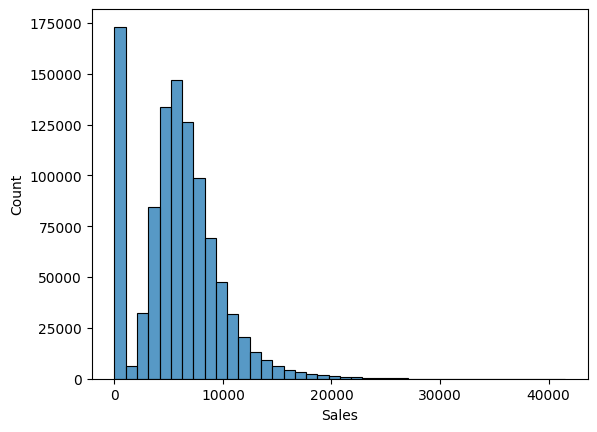

In [19]:
sns.histplot(data=train, x='Sales', bins= 40)

In [20]:
train.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [21]:
train[train.Open == 0].Sales.sum()

0

In [22]:
train= train[train.Open ==1].copy()
train.shape

(844392, 18)

<Axes: xlabel='Sales', ylabel='Count'>

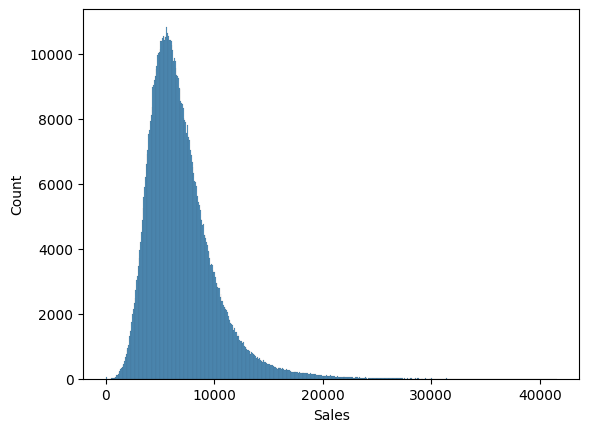

In [23]:
sns.histplot(data = train, x='Sales', kde= False)

Exploring some other columns 

Text(0.5, 1.0, 'Sales vs Customers')

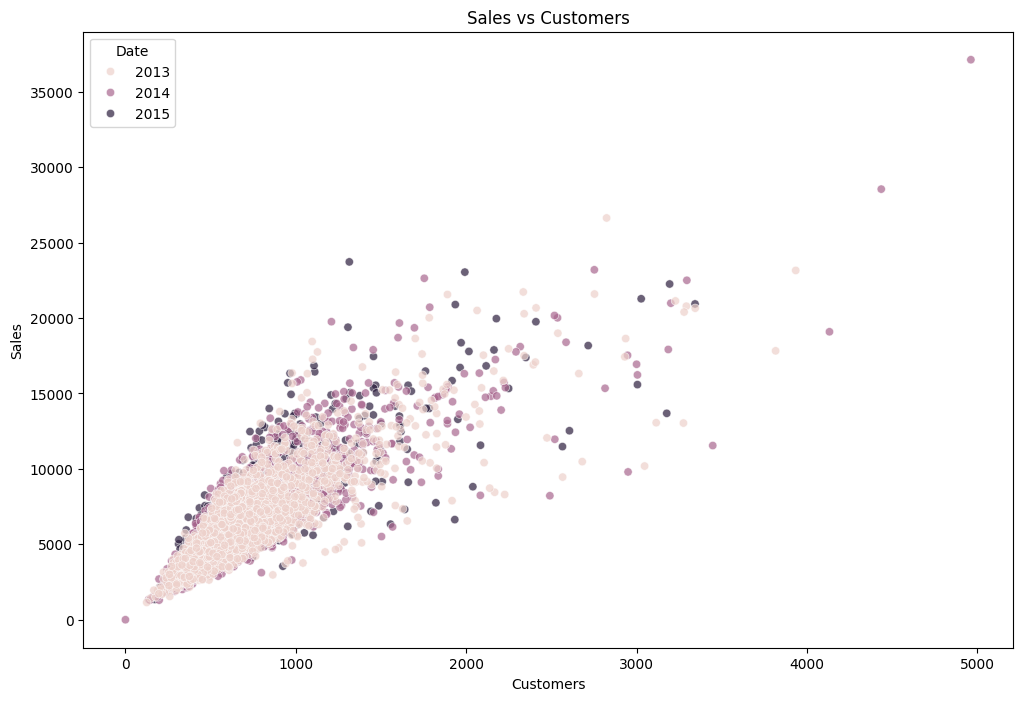

In [24]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=train.sample(5000), x='Customers', y='Sales', hue=train.Date.dt.year, alpha = 0.7)
plt.title('Sales vs Customers')

Here exits a high co-relaiton between the customers and Sales but we can't use this data as we can't predict the Number of custormers on that specific day.

Text(0.5, 1.0, 'Stores vs Sales')

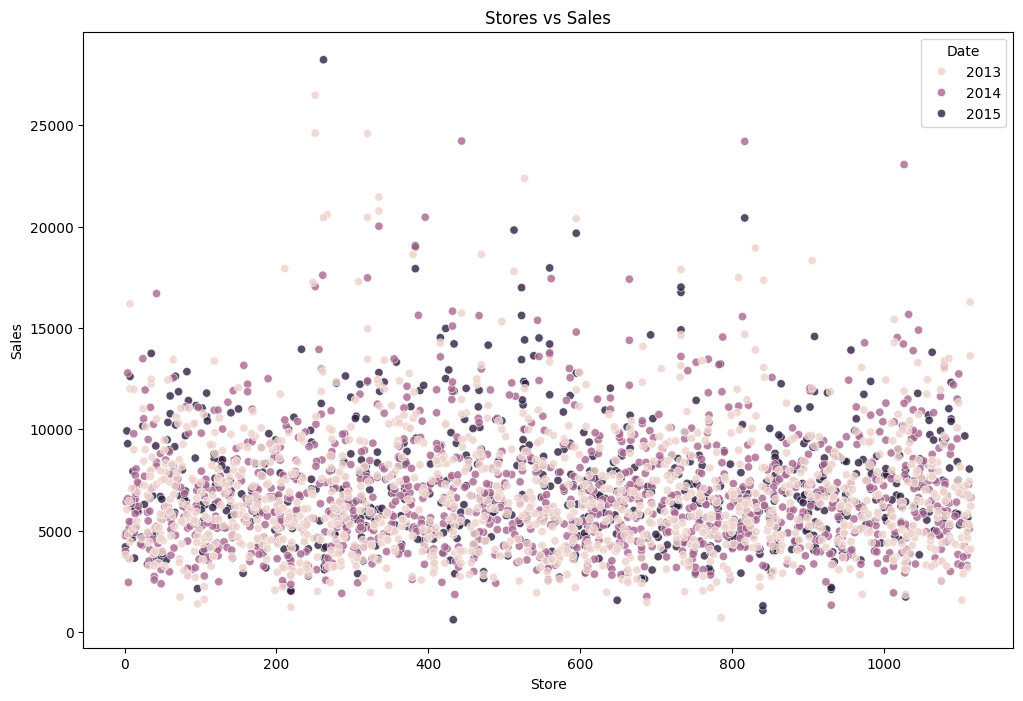

In [25]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data = train.sample(3000), x='Store', y='Sales', hue=train.Date.dt.year, alpha=0.8)
plt.title('Stores vs Sales')

Text(0.5, 1.0, 'DaysOfWeek vs Sales')

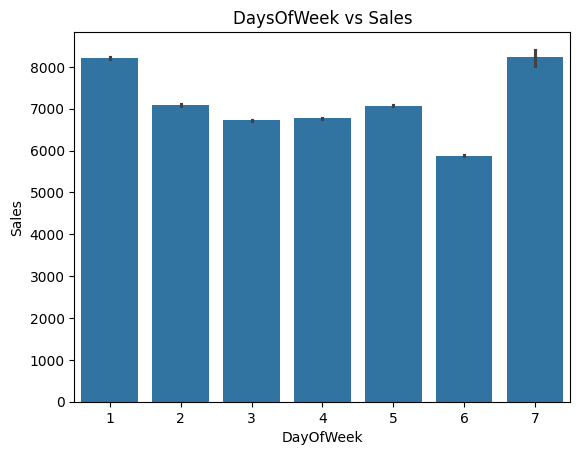

In [26]:
sns.barplot(data = train, x= 'DayOfWeek', y='Sales')
plt.title('DaysOfWeek vs Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

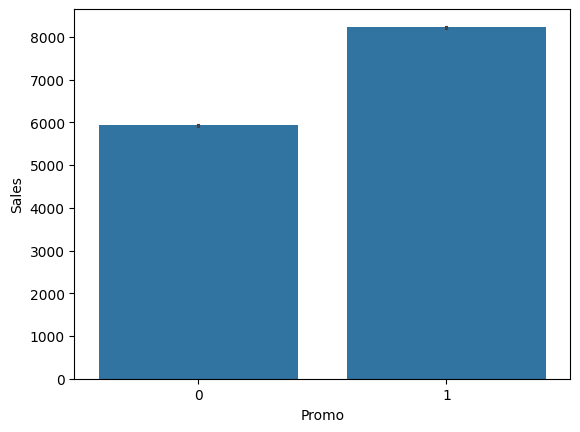

In [27]:
sns.barplot(data= train, x='Promo', y='Sales')

In [28]:
num_cols = train.describe().columns.tolist()
num_cols.remove('Open')
num_cols

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear']

In [29]:
train[num_cols].corr().Sales

Store                        0.007710
DayOfWeek                   -0.178736
Date                         0.062757
Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
SchoolHoliday                0.038617
CompetitionDistance         -0.036396
CompetitionOpenSinceMonth   -0.043489
CompetitionOpenSinceYear     0.016101
Promo2                      -0.127596
Promo2SinceWeek              0.095311
Promo2SinceYear             -0.034713
Name: Sales, dtype: float64

<Axes: >

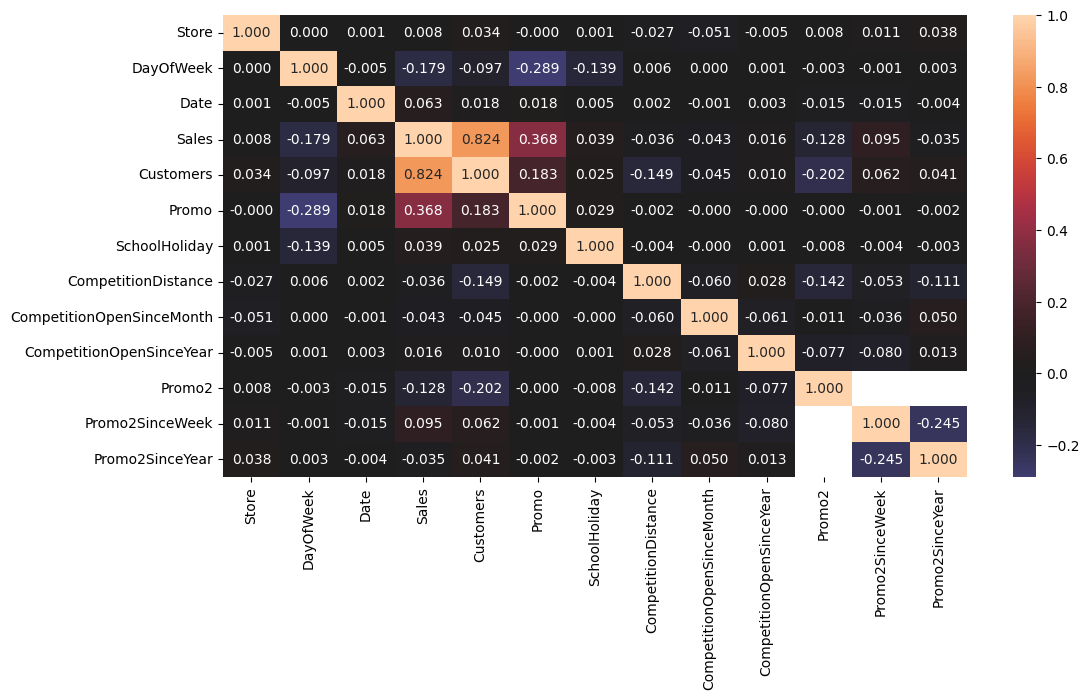

In [30]:
plt.figure(figsize=(12, 6))
sns.heatmap(train[num_cols].corr(), cmap='icefire', annot=True, fmt='.3f', center=0)

In [31]:
train[num_cols].corr()['Sales'].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
Promo2SinceWeek              0.095311
Date                         0.062757
SchoolHoliday                0.038617
CompetitionOpenSinceYear     0.016101
Store                        0.007710
Promo2SinceYear             -0.034713
CompetitionDistance         -0.036396
CompetitionOpenSinceMonth   -0.043489
Promo2                      -0.127596
DayOfWeek                   -0.178736
Name: Sales, dtype: float64

There is very less co-relation with the columns present in the test set. We need to create some of the columns with higher accuracy.

We can explore more and more columns how they are related to the target columns.

In [32]:
train['Day'] = train.Date.dt.day
train['Month'] = train.Date.dt.month
train['Year'] = train.Date.dt.year

In [33]:
test.sample(4)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
5755,5756,802,5,2015-09-11,1.0,0,0,0,a,c,910.0,NaN,NaN,1,22.0,2011.0,"Feb,May,Aug,Nov"
12220,12221,308,4,2015-09-03,1.0,1,0,0,a,a,1070.0,12.0,2006.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
26111,26112,558,2,2015-08-18,1.0,1,0,1,a,a,3000.0,2.0,2010.0,0,NaN,NaN,NaN
39070,39071,713,1,2015-08-03,1.0,1,0,1,a,c,220.0,NaN,NaN,1,10.0,2014.0,"Jan,Apr,Jul,Oct"


In [34]:
test.dtypes

Id                                    int64
Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Open                                float64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

In [35]:
test['Day'] = test.Date.dt.day
test['Month'] = test.Date.dt.month
test['Year'] = test.Date.dt.year
test.sample(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
21351,21352,1054,1,2015-08-24,1.0,0,0,1,a,c,13190.0,NaN,NaN,1,45.0,2013.0,"Feb,May,Aug,Nov",24,8,2015
2198,2199,631,2,2015-09-15,1.0,1,0,0,d,c,2870.0,NaN,NaN,1,35.0,2012.0,"Mar,Jun,Sept,Dec",15,9,2015
11566,11567,567,5,2015-09-04,1.0,1,0,0,c,a,1010.0,9.0,2012.0,1,18.0,2011.0,"Feb,May,Aug,Nov",4,9,2015
22132,22133,945,7,2015-08-23,0.0,0,0,0,a,c,12480.0,3.0,2011.0,0,NaN,NaN,NaN,23,8,2015
17843,17844,935,5,2015-08-28,1.0,0,0,1,a,c,22350.0,6.0,2010.0,0,NaN,NaN,NaN,28,8,2015


<Axes: xlabel='Year', ylabel='Sales'>

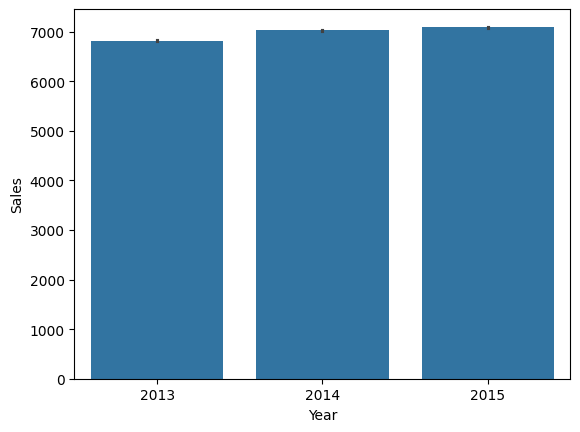

In [36]:
sns.barplot(data = train, x='Year', y='Sales')

A slight increase in the sales but not much

<Axes: xlabel='Month', ylabel='Sales'>

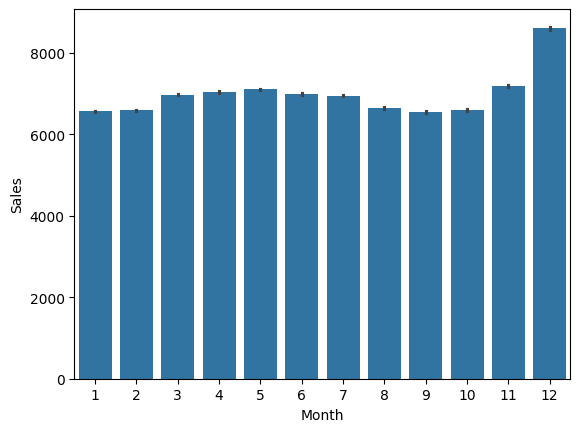

In [37]:
sns.barplot(data = train, x= 'Month', y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

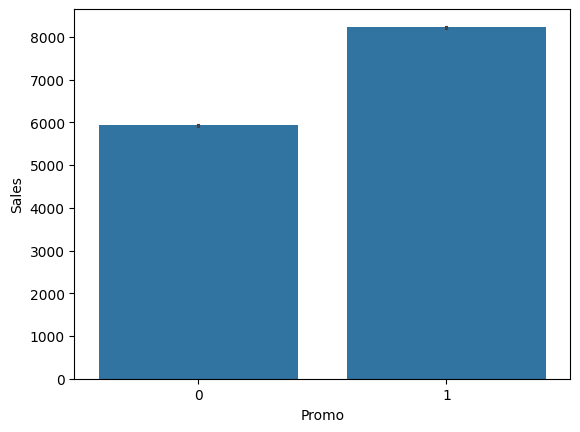

In [38]:
sns.barplot(data = train, x= 'Promo', y='Sales')

In [39]:
# sns.barplot(data = train, x= 'Promo2', y='Sales')

### Step 4 
Splitting the Data.

In [40]:
len(train)

844392

In [41]:
train_size = int(.75 * len(train))

In [42]:
train = train.sort_values("Date").reset_index()
train_data , val_data = train[:train_size], train[train_size:]
train_data.shape, val_data.shape

((633294, 22), (211098, 22))

In [43]:
train_data

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,...,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1,1016179,85,2,2013-01-01,4220,619,1,0,a,1,...,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
2,1016353,259,2,2013-01-01,6851,1444,1,0,a,1,...,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
3,1016356,262,2,2013-01-01,17267,2875,1,0,a,1,...,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
4,1016368,274,2,2013-01-01,3102,729,1,0,a,1,...,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633289,256632,745,3,2014-12-10,6897,657,1,0,0,0,...,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",10,12,2014
633290,256642,756,3,2014-12-10,15736,2292,1,0,0,0,...,50.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
633291,256634,747,3,2014-12-10,7444,608,1,0,0,0,...,45740.0,8.0,2008.0,0,NaN,NaN,NaN,10,12,2014
633292,256633,746,3,2014-12-10,5207,474,1,0,0,0,...,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",10,12,2014


In [44]:
val_data

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
633294,256637,751,3,2014-12-10,3720,533,1,0,0,0,...,650.0,10.0,2006.0,0,NaN,NaN,NaN,10,12,2014
633295,256638,752,3,2014-12-10,4258,404,1,0,0,0,...,970.0,3.0,2013.0,1,31.0,2013.0,"Feb,May,Aug,Nov",10,12,2014
633296,256639,753,3,2014-12-10,7170,654,1,0,0,0,...,540.0,11.0,2012.0,1,35.0,2010.0,"Mar,Jun,Sept,Dec",10,12,2014
633297,256640,754,3,2014-12-10,7359,837,1,0,0,0,...,380.0,5.0,2008.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec",10,12,2014
633298,256635,748,3,2014-12-10,4579,411,1,0,0,0,...,2380.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,744,745,5,2015-07-31,8363,746,1,1,0,1,...,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",31,7,2015
844388,745,746,5,2015-07-31,9082,638,1,1,0,1,...,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",31,7,2015
844389,746,747,5,2015-07-31,10708,826,1,1,0,1,...,45740.0,8.0,2008.0,0,NaN,NaN,NaN,31,7,2015
844390,740,741,5,2015-07-31,11253,1137,1,1,0,1,...,11900.0,NaN,NaN,0,NaN,NaN,NaN,31,7,2015


In [45]:
train_data.Date.min(), train.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [46]:
val_data.Date.min(), val_data.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

### Creating Input columns

In [47]:
train_data.columns

Index(['index', 'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open',
       'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

Creating a base model on which we will be checking the differnet models and the performances

Below are the columns used for creating the base model

In [48]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'Month', 'Year']
target_col = 'Sales'

Septaraing Numeric and categorical Columns

In [49]:
train[input_cols].nunique()

Store           1115
DayOfWeek          7
Promo              2
StateHoliday       5
StoreType          4
Assortment         3
Day               31
Month             12
Year               3
dtype: int64

In [50]:
train[input_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Store         844392 non-null  int64 
 1   DayOfWeek     844392 non-null  int64 
 2   Promo         844392 non-null  int64 
 3   StateHoliday  844392 non-null  object
 4   StoreType     844392 non-null  object
 5   Assortment    844392 non-null  object
 6   Day           844392 non-null  int32 
 7   Month         844392 non-null  int32 
 8   Year          844392 non-null  int32 
dtypes: int32(3), int64(3), object(3)
memory usage: 48.3+ MB


In [51]:
train['StateHoliday'].unique()

array(['a', '0', 'b', 'c', 0], dtype=object)

In [52]:
train['StateHoliday'].value_counts()

StateHoliday
0    731342
0    112140
a       694
b       145
c        71
Name: count, dtype: int64

In [53]:
train.StateHoliday = train.StateHoliday.astype('str')

In [54]:
# NoHolidayCount = len(train[(train['StateHoliday'] == 0) | (train['StateHoliday'] == '0')])
# NoHolidayCount

'0' and 0 are same but treated different

In [55]:
num_cols = ['Store', 'Day', 'Month', 'Year']
cat_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

In [56]:
x_train = train_data[input_cols]
y_train = train_data[target_col]
x_val = val_data[input_cols]
y_val = val_data[target_col]
x_test = test[input_cols]

### Imputing the values

In [57]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean').fit(train[num_cols])

In [58]:
x_train[num_cols] = imputer.transform(x_train[num_cols])
x_val[num_cols] = imputer.transform(x_val[num_cols])
x_test[num_cols] =  imputer.transform(x_test[num_cols])

C:\Users\Ayush\AppData\Local\Temp\ipykernel_13648\1441155249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[num_cols] = imputer.transform(x_train[num_cols])
C:\Users\Ayush\AppData\Local\Temp\ipykernel_13648\1441155249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val[num_cols] = imputer.transform(x_val[num_cols])
C:\Users\Ayush\AppData\Local\Temp\ipykernel_13648\1441155249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [59]:
x_train[num_cols].isna().sum()

Store    0
Day      0
Month    0
Year     0
dtype: int64

Need to apply scaling on the numerical columns so that all the values lies in the same order.

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(train[num_cols])

In [61]:
x_train[num_cols] = scaler.transform(x_train[num_cols])
x_val[num_cols] = scaler.transform(x_val[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

C:\Users\Ayush\AppData\Local\Temp\ipykernel_13648\582833942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[num_cols] = scaler.transform(x_train[num_cols])
C:\Users\Ayush\AppData\Local\Temp\ipykernel_13648\582833942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val[num_cols] = scaler.transform(x_val[num_cols])
C:\Users\Ayush\AppData\Local\Temp\ipykernel_13648\582833942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [62]:
x_train.describe()

,Store,DayOfWeek,Promo,Day,Month,Year
count,633294.000000,633294.000000,633294.000000,633294.000000,633294.000000,633294.000000
mean,0.500437,3.519658,0.443303,0.488868,0.478522,0.233186
std,0.288786,1.724581,0.496775,0.290426,0.306317,0.249434
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251346,2.000000,0.000000,0.233333,0.181818,0.000000
50%,0.500000,3.000000,0.000000,0.500000,0.454545,0.000000
75%,0.750449,5.000000,1.000000,0.733333,0.727273,0.500000
max,1.000000,7.000000,1.000000,1.000000,1.000000,0.500000


In [63]:
num_cols, cat_cols

(['Store', 'Day', 'Month', 'Year'],
 ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment'])

### Encoding the numerical Columns

In [70]:
print(train[cat_cols].nunique())
for col in cat_cols:
    print(col, train[col].unique())

DayOfWeek       7
Promo           2
StateHoliday    4
StoreType       4
Assortment      3
dtype: int64
DayOfWeek [2 3 4 5 6 7 1]
Promo [0 1]
StateHoliday ['a' '0' 'b' 'c']
StoreType ['b' 'a' 'd' 'c']
Assortment ['b' 'a' 'c']


In [71]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train[cat_cols])

c:\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [74]:
encoded_cols = list(encoder.get_feature_names_out(cat_cols))
len(encoded_cols)

20

In [75]:
x_train[encoded_cols] = encoder.transform(x_train[cat_cols])
x_test[encoded_cols] = encoder.transform(x_test[cat_cols])
x_val[encoded_cols] = encoder.transform(x_val[cat_cols])

C:\Users\Ayush\AppData\Local\Temp\ipykernel_13648\1182473310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[encoded_cols] = encoder.transform(x_train[cat_cols])
C:\Users\Ayush\AppData\Local\Temp\ipykernel_13648\1182473310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[encoded_cols] = encoder.transform(x_train[cat_cols])
C:\Users\Ayush\AppData\Local\Temp\ipykernel_13648\1182473310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [77]:
x_train.sample(4)
x_train.shape

(633294, 29)

In [79]:
x_train[encoded_cols]

,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Promo_0,Promo_1,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633289,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
633290,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
633291,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
633292,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [80]:
x_train = x_train[num_cols + encoded_cols]
x_val = x_val[num_cols + encoded_cols]
x_test = x_test[num_cols + encoded_cols]

In [81]:
x_train

,Store,Day,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0.983842,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.075404,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.231598,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.234291,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.245063,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633289,0.667864,0.3,1.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
633290,0.677738,0.3,1.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
633291,0.669659,0.3,1.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
633292,0.668761,0.3,1.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
